### Question 1: Identify the glass type (70)

Following is a data about the glass. Each observation represents one glass with its type and corresponding oxide content. There are 6 types of glass in the data.

In [19]:
import pandas as pd

glass = pd.read_csv('glass.csv')
glass.head()

,ID,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df2={}
process=0
my_dict=[]
TfidfVectorizer=0

for i in df2.assignee:
  x,y=process.extractOne(i, my_dict.keys())

def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(list(df2['assignee']))


1. Split the training and test data. Fit a decision tree and plot it. (10) 

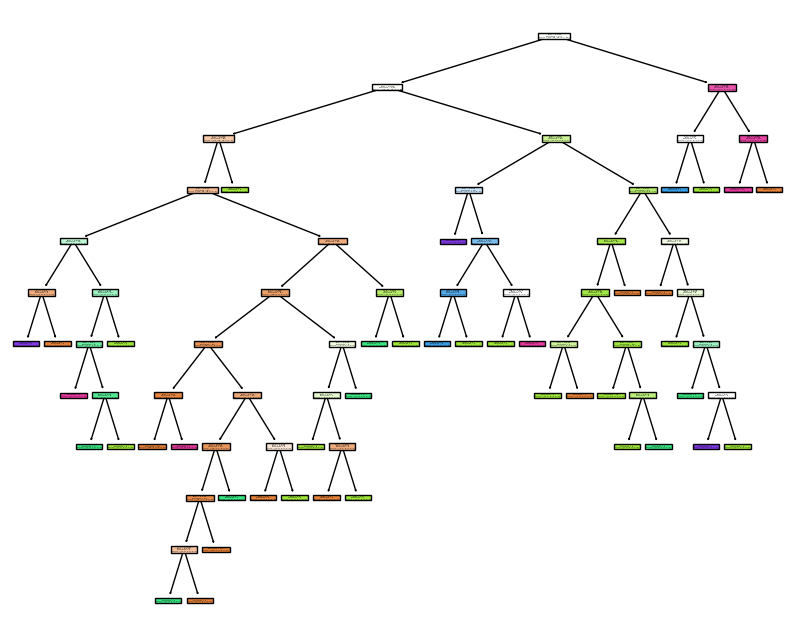

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
X=glass.drop(columns=['ID','type'])
y=glass.type

X_train,X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=4400)
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state = 4400)

# Fit the decision tree model to the training data
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=list(glass.columns), filled=True)
plt.show()

2. Pruning the tree with parameter ccp_alpha. Plot the best tree. Print the best parameter and accuracy. Note: remember to split the training data into training and validation. You can choose the alpha from 0.01 to 10, and ignore the warning message. (20)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=4400)
param_grid={
    'ccp_alpha': [0.01,0.1,0.5,1,2,5,10]
}
grid_search= GridSearchCV(estimator=clf, param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(X_train, y_train)
tree_pred = best_tree.predict(X_test)
accurary=accuracy_score(y_test,tree_pred)
print('the best paramters are '+ str(best_params))
print('the accuracy is '+ str(accurary))

the best paramters are {'ccp_alpha': 0.01}
the accuracy is 0.7441860465116279


3. Fit an Adaboost model. Set the n_estimator equal to 100. Print the accuracy. (10) 

In [22]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
# Create and fit an AdaBoost classifier with decision tree as the base estimator
adaboost = AdaBoostClassifier(n_estimators=100, random_state=4400)
adaboost.fit(X_train, y_train)

# Make predictions using the AdaBoost classifier
adaboost_predictions = adaboost.predict(X_test)

# Calculate accuracy of the AdaBoost classifier
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Accuracy:", adaboost_accuracy)

AdaBoost Accuracy: 0.46511627906976744


4. Fit a random forest model. Tune the parameters 'n_estimators', 'max_depth', 'min_samples_leaf' and 'max_features', Print the accuracy and show the variable important plot. (20)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Random Forest Accuracy: 0.7441860465116279
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}


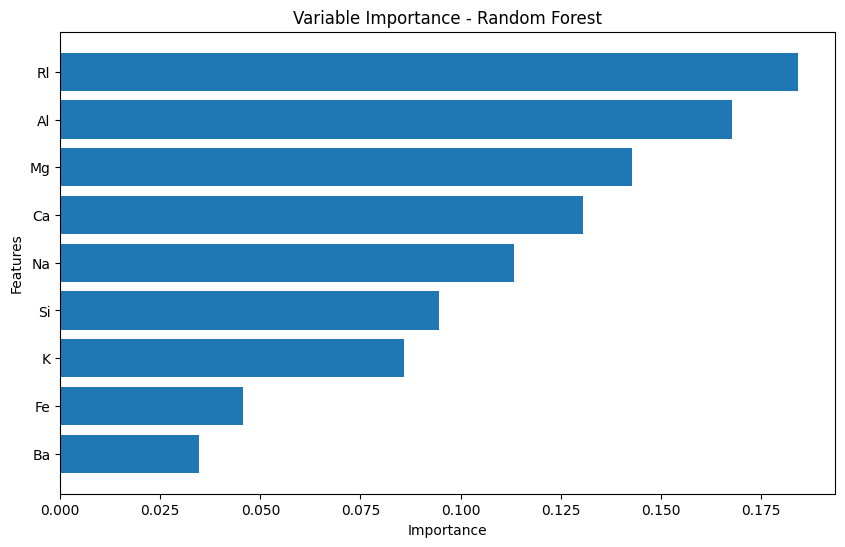

In [23]:
from sklearn.model_selection import GridSearchCV
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                    test_size=0.5,
                                                    random_state=4400)

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=4400)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search to find the best combination of parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_valid, y_valid)

# Get the best estimator and its parameters
best_params = grid_search.best_params_

# Make predictions using the best Random Forest classifier
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Calculate accuracy of the best Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Best Random Forest Accuracy:", accuracy)
print("Best Parameters:", best_params)

import numpy as np

# Plot the variable importance for Random Forest
importances = best_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Variable Importance - Random Forest")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [X.columns[i] for i in indices])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

5. Fit another decision tree with the most three important features. Plot the decision tree and print the accuracy. (10)

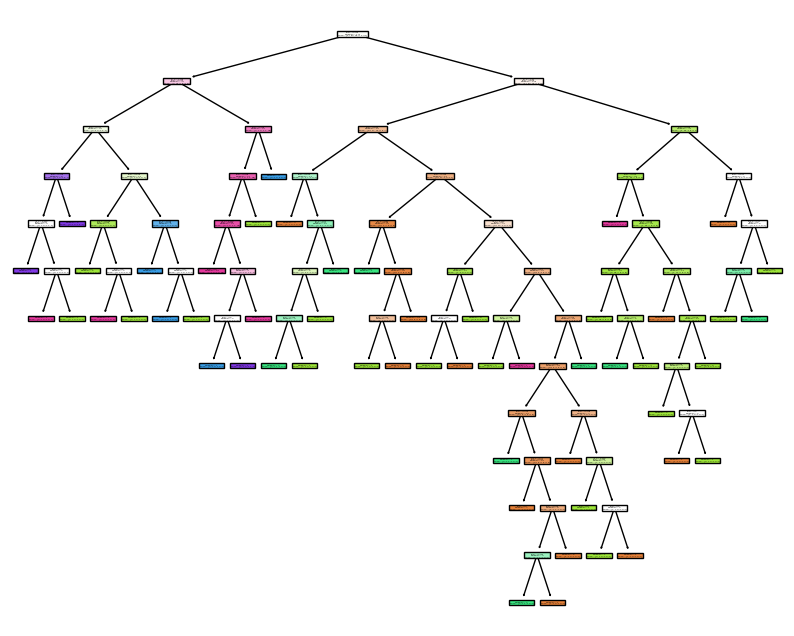

the accuracy is 0.6511627906976745


In [25]:
X=glass[['Rl','Al','Mg']]
y=y=glass.type
X_train,X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=4400)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=list(glass.columns), filled=True)
plt.show()
print('the accuracy is '+ str(accuracy))

### Question 2: Models comparison (30)

1. List a couple of characteristics that may lead you to consider using random forest. (Data size, features, etc. )

If your data has a large number of variables and the variables are highly correlated with each other because random forest will make trees based on all variables. So your data size needs to be large enough to do this.

2. Compare the differences between Logistics regression and Random forest. 

logistic regression models probability is usually less complex and is more interapribitly then random forest. Random forest can be used for both doth probabaility and classification.

3. Explain why Random Forest is called "random forest"?

because Restrict the node decisions to a small subset of features picked randomly for each node